<a href="https://colab.research.google.com/github/mirjanaa/Bee-Colony-Optimization/blob/main/genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [379]:
import numpy as np
import random

In [380]:
class Individual:

  def __init__(self, bounds, obj_function):
    self.code = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
    self.obj_value = obj_function(self.code)
    self.fitness = self.calc_fitness()

  def __lt__(self, other):
    return self.fitness < other.fitness


  def calc_fitness(self):
    return 1 / (1 + self.obj_value)


In [381]:
bounds = np.array([(-5.12, 5.12), (-5.12, 5.12)])

In [382]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A*n + sum(x_i**2 - A*np.cos(2*np.pi*x_i) for x_i in x)

In [383]:
def selection(population, tournament_size):
  TOURNAMENT_SIZE = tournament_size
  bestFitness = float('-inf')
  index = -1
  for i in range(TOURNAMENT_SIZE):
      randomIndividual = random.randrange(len(population))
      if population[randomIndividual].fitness > bestFitness:
          bestFitness = population[randomIndividual].fitness
          index = randomIndividual
  return index 

In [384]:
def crossover(parent1, parent2, child1, child2):
  
  # breakpoint = random.randrange(len(parent1.code))
    
  # child1.code[:breakpoint] = parent1.code[:breakpoint]
  # child2.code[:breakpoint] = parent2.code[:breakpoint]
  
  # child1.code[breakpoint:] = parent2.code[breakpoint:]
  # child2.code[breakpoint:] = parent1.code[breakpoint:]

  for i in range(len(parent1.code)):
    child1.code[i] = (parent1.code[i] + parent2.code[i]) / 2
    if random.random() < 0.5:
      child2.code[i] = parent1.code[i]
    else:
      child2.code[i] = parent2.code[i]



  print(child1.code)
  print(child2.code)


In [385]:
def mutation(individual):
  MUTATION_PROB = 0.05
  for i in range(len(individual.code)):
      if random.random() < MUTATION_PROB:
          individual.code[i] = random.uniform(bounds[i][0], bounds[i][1])

In [386]:
def genetic_algorithm(population_size, generation_size, tournament_size, obj_function):

  POPULATION_SIZE = population_size
  GENERATION_SIZE = generation_size
  ELITISIM_SIZE = POPULATION_SIZE // 5
  TOURNAMENT_SIZE = tournament_size

  population = [Individual(bounds, obj_function) for _ in range(POPULATION_SIZE)]
  new_population = [Individual(bounds, obj_function) for _ in range(POPULATION_SIZE)]

  fitness_values = []
  obj_values = []

  for i in range(GENERATION_SIZE):
    population.sort(reverse=True)
    new_population[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]

    fitness_values.append(population[0].fitness)
    obj_values.append(population[0].obj_value)

    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
      index_parent1 = selection(population, TOURNAMENT_SIZE)
      index_parent2 = selection(population, TOURNAMENT_SIZE)

      crossover(population[index_parent1], population[index_parent2], new_population[j], new_population[j+1])

      mutation(new_population[j])
      mutation(new_population[j+1])

      new_population[j].fitness = new_population[j].calc_fitness()
      new_population[j+1].fitness = new_population[j+1].calc_fitness()

    population = new_population

  best_individual = max(population) 

  return best_individual, obj_values, fitness_values






In [388]:
result = genetic_algorithm(250, 1000, 5, rastrigin)
#print("Best solution: ", result.code)

Streaming output truncated to the last 5000 lines.
[0.77421733 5.0532499 ]
[-0.96604187 -1.22504137]
[-0.90802101 -3.03327797]
[ 0.73545661 -0.27712453]
[1.22172925 0.22843071]
[ 0.34801669 -0.66688675]
[-1.27276795 -0.74824206]
[ 1.27935044 -1.37237573]
[ 1.16512371 -3.5675777 ]
[-1.19195492 -0.83475355]
[-0.43621551 -1.83258263]
[0.99797329 0.23307537]
[1.22172925 0.23772003]
[-0.50994493  0.1063444 ]
[1.14617481 2.04527143]
[-1.67603469 -0.03536067]
[-2.28991653 -1.5449706 ]
[-0.4651291   1.17556318]
[-2.13872394  1.80205668]
[-0.09156645  0.46404202]
[-1.12705202  0.66404636]
[-1.52852753 -0.5491445 ]
[0.0669224  0.79749369]
[0.96904561 0.59819898]
[0.99417211 0.93236029]
[2.13119687 0.33330928]
[ 1.27935044 -1.37237573]
[ 0.06863536 -0.11640153]
[ 0.57348624 -1.83258263]
[ 0.80201664 -0.84539409]
[ 0.74990191 -2.48828186]
[4.04846132 0.03975785]
[4.04846132 0.03975785]
[ 0.4279114  -0.43806229]
[ 2.12859076 -0.74824206]
[-0.15980906 -1.06832473]
[-1.11638711 -2.01097736]
[-0.42815

KeyboardInterrupt: ignored

## Compare genetic to abc algorithm


In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt

class FoodSource:
  def __init__(self, bounds, obj_function):
    self.position = np.array([random.uniform(bound[0], bound[1]) for bound in bounds])
    self.obj_value = obj_function(self.position)
    self.fitness = self.calculate_fitness()
    self.trial = 0
    self.probability = 0

  def __lt__(self, other):
    return self.obj_value < other.obj_value

  def __gt__(self, other):
    return self.fitness > other.fitness

  def calculate_fitness(self):
    if self.obj_value >= 0:
      return 1 / (1 + self.obj_value)
    return 1 + abs(self.obj_value) 
    
    
bounds = np.array([(-5.12, 5.12), (-5.12, 5.12)])



def generate_new_solution(i, population, lb, ub, obj_function):

  j = random.randrange(len(bounds))
  partner = random.randrange(len(population))

  while i == partner:
    partner = random.randrange(len(population))

  phi = random.uniform(-1, 1)

  old_fitness = population[i].fitness
  old_objective_value = population[i].obj_value

  old_j = population[i].position[j]
  new_j = population[i].position[j] + phi * (population[i].position[j] - population[partner].position[j])

  population[i].position[j] = new_j
  population[i].position[j] = np.clip(population[i].position[j], lb[j], ub[j])
  
  new_objective_value = obj_function(population[i].position)
   
  population[i].obj_value = new_objective_value
  population[i].fitness = population[i].calculate_fitness()

  if population[i].fitness > old_fitness:
    population[i].trial = 0
  
  else:
    population[i].position[j] = old_j
    population[i].obj_value = old_objective_value
    population[i].fitness = old_fitness
    population[i].trial = population[i].trial + 1 

    
    
    
def ABC_algorithm(population_size, num_of_iters, limit, obj_function):

  POPULATION_SIZE = population_size
  NUM_OF_ITERATIONS = num_of_iters
  LIMIT = limit

  lower_bound = np.array([x[0] for x in bounds])
  upper_bound = np.array([x[1] for x in bounds])


  population = [FoodSource(bounds, obj_function) for _ in range(POPULATION_SIZE)]

  best_solution = min(population)

  obj_values = []
  fitness_values = []

  for k in range(NUM_OF_ITERATIONS):
    #### Employed Bee Phase ####
    for i in range(POPULATION_SIZE):
      generate_new_solution(i, population, lower_bound, upper_bound, obj_function)

    #### Onlooker Bee Phase ####
    max_fitness = max([population[i].fitness for i in range(POPULATION_SIZE)])
    for i in range(POPULATION_SIZE):
      population[i].probability = 0.9 * (population[i].fitness / max_fitness) + 0.1


    m = 0
    n = 0

    while m < POPULATION_SIZE and n < POPULATION_SIZE:
      rand_value = random.uniform(0, 1)
      if rand_value < population[n].probability:
        generate_new_solution(n, population, lower_bound, upper_bound, obj_function)
        m += 1
      n = (n % POPULATION_SIZE) + 1

    best_solution = min(min(population), best_solution)

    #### Scout Bee Phase ####
    max_index = -1
    max_trial = float('-inf')
    for index, p in enumerate(population):
      if p.trial > max_trial:
        max_trial = p.trial
        max_index = index


    if population[max_index].trial > LIMIT:
      population[max_index] = FoodSource(bounds, obj_function)

    best_solution = min(min(population), best_solution)

    obj_values.append(best_solution.obj_value)
    fitness_values.append(best_solution.fitness)

  print("position: ", [i for i in best_solution.position])
  print("objective value: ", best_solution.obj_value)
  print("fitness value: ", best_solution.fitness)

  #plt.plot(range(NUM_OF_ITERATIONS), obj_values)
  #plt.plot(range(NUM_OF_ITERATIONS), fitness_values)
  return best_solution, obj_values, fitness_values
    
    
    

position:  [-0.054094438167186835, -0.05533246305297013]
objective value:  1.1763478717101883
fitness value:  0.4594853667461689
[0.36173579 0.56962365]
[-1.01856163  2.21344212]
[-0.50765533 -1.40128911]
[ 0.00325097 -1.72838339]
[-1.01856163 -1.07419482]
[-1.01856163 -1.07419482]
[-3.26607907 -0.55390946]
[-3.77758788 -2.84536039]
[1.86097644 2.25068405]
[4.92137994 2.60773797]
[ 0.45808393 -1.61274804]
[ 2.04211111 -1.0889913 ]
[-1.01856163 -1.07419482]
[-1.01856163 -1.07419482]
[-0.38288283 -0.3890953 ]
[0.36002188 1.23746119]
[-1.85472871  1.35738927]
[0.15364408 1.78507819]
[ 2.04211111 -1.0889913 ]
[ 2.04211111 -1.0889913 ]
[-0.0395002  -1.93276644]
[-1.01856163 -2.79133805]
[0.27130308 2.05353613]
[1.7420332  1.89363014]
[-1.01856163 -1.07419482]
[-1.01856163 -1.07419482]
[ 0.04190409 -0.71560098]
[ 1.10236981 -0.35700713]
[ 0.07070517 -0.06088077]
[ 0.31719417 -1.9593819 ]
[-1.2737787  -0.50559805]
[-1.42176986 -2.0156518 ]
[-0.08626642  0.05461848]
[-0.17578382 -1.72838339]
[

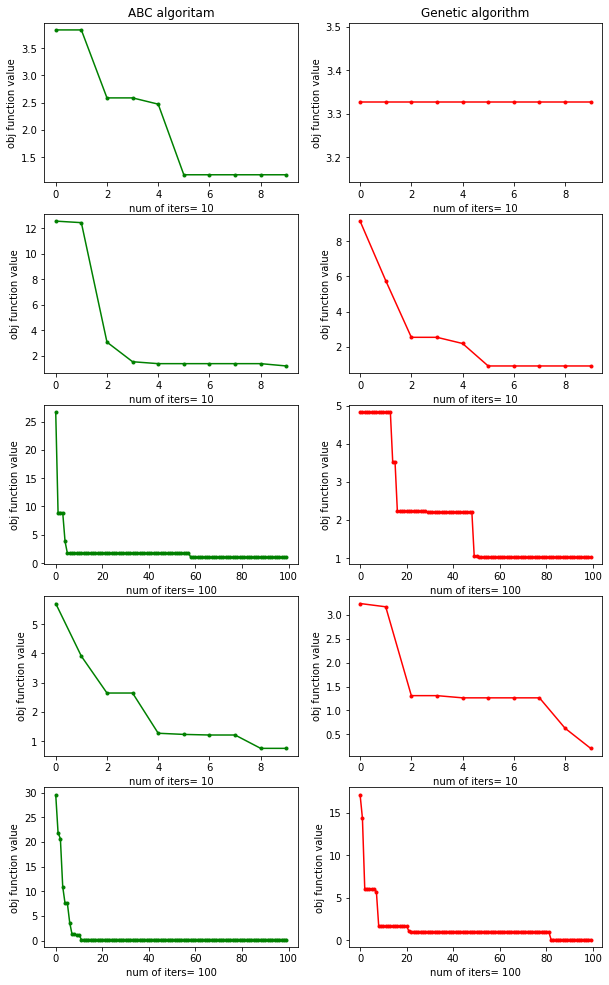

In [389]:
population_size = [5, 50, 100]
num_iters = [10, 100]
limit = [2, 5]
target = 75

tmp=5

plt.figure(figsize=(10, 17))

p = random.sample(population_size, k=1)[0]
n = random.sample(num_iters, k=1)[0]
l = random.sample(limit, k=1)[0]
t = random.sample(range(10), k=1)[0]

_, obj_values, fitness = ABC_algorithm(p, n, l, rastrigin)
plt.subplot(tmp, 2, 1)
plt.plot(range(n), obj_values, color='green', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("obj function value")
plt.title('ABC algoritam')

_, obj_values, fitness = genetic_algorithm(p, n, t, rastrigin)
plt.subplot(tmp, 2, 2)
plt.plot(range(n), obj_values, color='red', marker='.')
plt.xlabel("num of iters= " + str(n))
plt.ylabel("obj function value")
plt.title('Genetic algorithm')

for i in range(1, tmp):
  p = random.sample(population_size, k=1)[0]
  n = random.sample(num_iters, k=1)[0]
  l = random.sample(limit, k=1)[0]

  _, obj_values, fitness = ABC_algorithm(p, n, l, rastrigin)
  plt.subplot(tmp, 2, 2*i+1)
  plt.plot(range(n), obj_values, color='green', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("obj function value")

  best_solution, obj_values, fitness = ABC_algorithm(p, n, t, rastrigin)
  plt.subplot(tmp, 2, 2*i+2)
  plt.plot(range(n), obj_values, color='red', marker='.')
  plt.xlabel("num of iters= " + str(n))
  plt.ylabel("obj function value")

plt.show()